In [1]:
import kaggle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
!kaggle datasets download loveall/clicks-conversion-tracking --unzip

Dataset URL: https://www.kaggle.com/datasets/loveall/clicks-conversion-tracking
License(s): other




  0%|          | 0.00/18.0k [00:00<?, ?B/s]
100%|##########| 18.0k/18.0k [00:00<00:00, 744kB/s]


In [3]:
sales = pd.read_csv("KAG_conversion_data.csv")  # Use the correct file name
sales.head(5)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


# DATA PREPROCESSING

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [5]:
sales.rename(columns={"xyz_campaign_id":"campaign_id"},inplace=True)

## DESCRIPTIVE ANALYSIS

In [6]:
df=pd.DataFrame(
    {
        "Data_Type": sales.dtypes,
        "Missing_Count":sales.isnull().sum(),
        "Missing_Rate(%)": 100*(sales.isnull().mean()),
        "Unique_Count":sales.nunique(),
        "Unique_Count(%)":round(100*(sales.nunique()/sales.shape[0]),2),
        "Duplicates_Count (#)": [sales[c].duplicated().sum() for c in sales.columns],
        "Duplicate_Count(%)":[round(100* sales[c].duplicated().sum()/sales.shape[0],2) for c in sales.columns]
    }
)
df

,Data_Type,Missing_Count,Missing_Rate(%),Unique_Count,Unique_Count(%),Duplicates_Count (#),Duplicate_Count(%)
ad_id,int64,0,0.0,1143,100.00,0,0.00
campaign_id,int64,0,0.0,3,0.26,1140,99.74
fb_campaign_id,int64,0,0.0,691,60.45,452,39.55
age,object,0,0.0,4,0.35,1139,99.65
gender,object,0,0.0,2,0.17,1141,99.83
interest,int64,0,0.0,40,3.50,1103,96.50
Impressions,int64,0,0.0,1130,98.86,13,1.14
Clicks,int64,0,0.0,183,16.01,960,83.99
Spent,float64,0,0.0,869,76.03,274,23.97
Total_Conversion,int64,0,0.0,32,2.80,1111,97.20


##### *KEY FINDINGS
* There are no missing values in dataset.
* Dataset contains data of **1143** ads.
* There are **3** campaigns in dataset.
* There are **691** unique facebook campaigns.
* There are **4** different age_groups (1143-1139)=4.

### *DISTRIBUTION OF DATA IN NUMERICAL COLUMNS

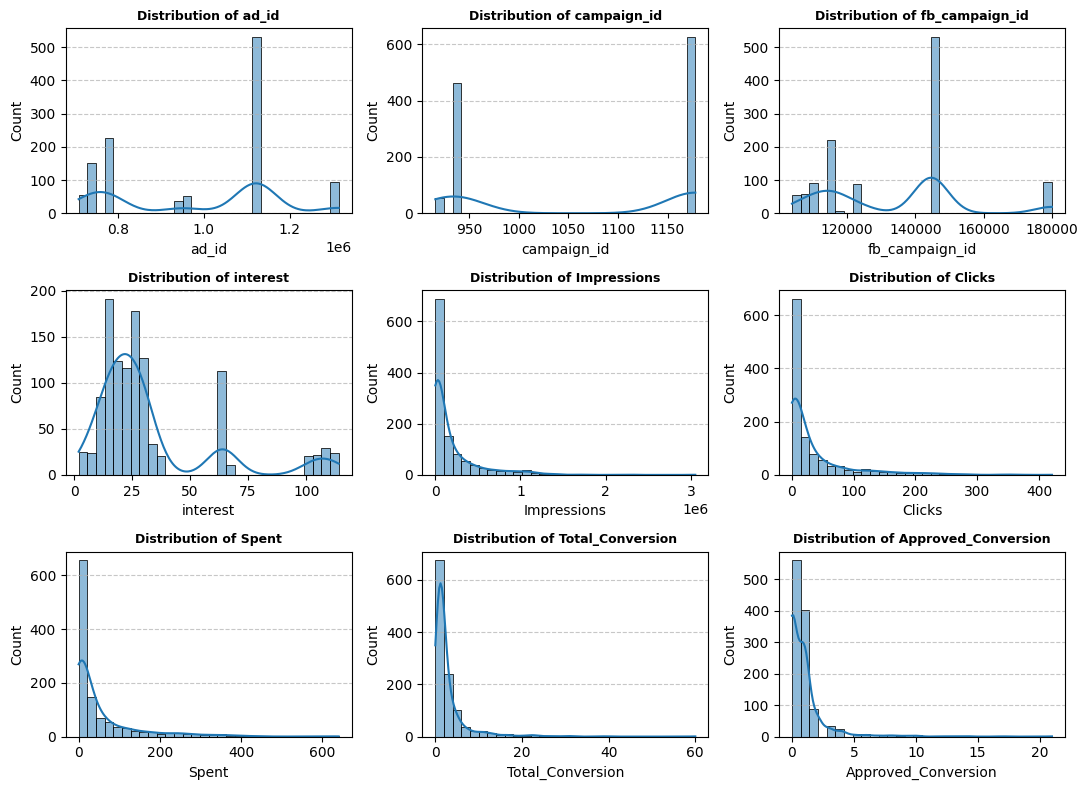

In [7]:
Numerical_variables=sales.select_dtypes(include=["int64","float64"]).columns
num_cols=len(Numerical_variables)

fig,axes=plt.subplots(3,3,figsize=(11,8))
axes=axes.flatten()

if num_cols==1:
    axes=[axes]

for i,col in enumerate(Numerical_variables):
    ax=axes[i]
    
    sns.histplot(data=sales,x=col,bins=30,kde=True,edgecolor="black",ax=ax)
    plt.grid(axis="y",linestyle="--",alpha=0.7)

    ax.set_title(f'Distribution of {col}',fontweight="bold",fontsize=9)
    ax.set_xlabel(f"{col}")
    ax.set_ylabel("Count")
    ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

### *DISTRIBUTION OF DATA IN CATEGORICAL COLUMNS

C:\Users\kalra\AppData\Local\Temp\ipykernel_3784\3197506347.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sales,x=col,palette="muted",edgecolor="black",ax=ax)
C:\Users\kalra\AppData\Local\Temp\ipykernel_3784\3197506347.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sales,x=col,palette="muted",edgecolor="black",ax=ax)


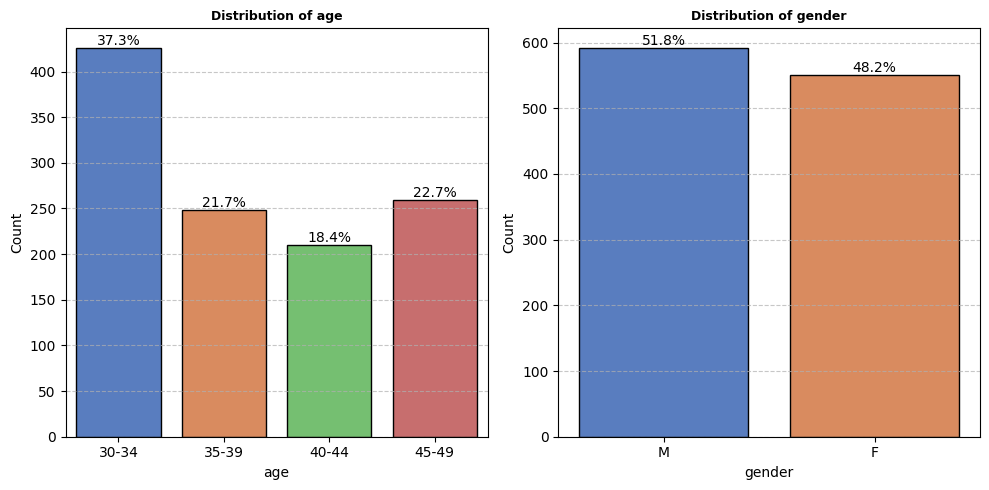

In [8]:
Categorical_variable=sales.select_dtypes(exclude=["int64","float64"]).columns

cat_cols=len(Categorical_variable)

fig,axes=plt.subplots(1,cat_cols,figsize=(5*cat_cols,5))

if cat_cols==1:
    axes=[axes]

for i,col in enumerate(Categorical_variable):
    ax=axes[i]
    sns.countplot(data=sales,x=col,palette="muted",edgecolor="black",ax=ax)
    ax.set_title(f"Distribution of {col}",fontsize=9,fontweight="bold")
    ax.set_xlabel(f"{col}")
    ax.set_ylabel("Count")
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    total=len(sales[col])
    
    for bar in ax.containers:
        ax.bar_label(bar,labels=[f"{(val/total*100):.1f}%"for val in bar.datavalues],fontsize=10, color='black')
plt.tight_layout()
plt.show()

# FEATURE ENGINEERING

In [9]:
sales["CTR"]=sales["Clicks"]/sales["Impressions"]*100              ### CLICK THROUGH RATE
sales["CPC"]=np.where(sales["Clicks"]>0, sales["Spent"]/sales["Clicks"],0)   ### COST PER CLICK
sales["Cost_per_conversion"]=np.where(sales["Total_Conversion"]>0, sales["Spent"]/sales["Total_Conversion"],np.nan)
sales["Conversion_per_spend"]=np.where(sales["Spent"]>0, sales["Total_Conversion"]/sales["Spent"],0)
sales["Total_conversion_rate"]=np.where(sales["Clicks"]>0,(sales["Total_Conversion"]/sales["Clicks"])*100,np.nan)
sales["Approved_conversion_rate"]=np.where(sales["Clicks"]>0,(sales["Approved_Conversion"]/sales["Clicks"])*100,np.nan)

conversion_columns=["CTR","CPC","Cost_per_conversion","Total_conversion_rate","Approved_conversion_rate"]

### **Feature Engineering - Creating New Metrics**  

After performing feature engineering, the following new columns were created:  

- **CTR (Click-Through Rate)**: Measures the percentage of impressions that resulted in clicks. Formula:  
  $$CTR = \left( \frac{\text{Clicks}}{\text{Impressions}} \right) \times 100$$  

- **CPC (Cost Per Click)**: Represents the cost incurred per click. If there are no clicks, CPC is set to **0**. Formula:  
  $$CPC = \frac{\text{Spent}}{\text{Clicks}}$$  

- **Cost per Conversion**: Calculates the cost to achieve each conversion. If no conversions occurred, the value is **NaN**. Formula:  
  $$\text{Cost per Conversion} = \frac{\text{Spent}}{\text{Total Conversion}}$$  

- **Conversion per Spend**: Shows the number of conversions per unit of money spent. If no money is spent, it's set to **0**. Formula:  
  $$\text{Conversion per Spend} = \frac{\text{Total Conversion}}{\text{Spent}}$$  

- **Total Conversion Rate**: Measures how many clicks resulted in a conversion. If there are no clicks, the value is **NaN**. Formula:  
  $$\text{Total Conversion Rate} = \left( \frac{\text{Total Conversion}}{\text{Clicks}} \right) \times 100$$  

- **Approved Conversion Rate**: Shows the percentage of approved conversions out of total clicks. If there are no clicks, the value is **NaN**. Formula:  
  $$\text{Approved Conversion Rate} = \left( \frac{\text{Approved Conversion}}{\text{Clicks}} \right) \times 100$$  


# Exploratory Data Analysis

### *DISTRIBUTION OF DATA IN CONVERSION COLUMNS

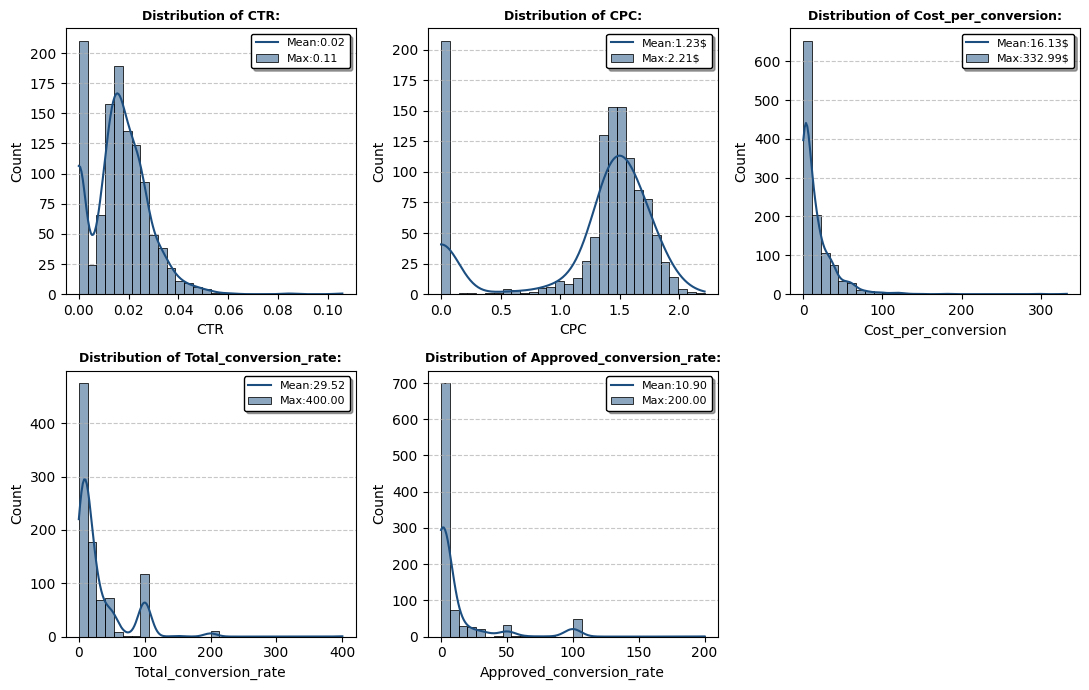

In [10]:
conversion_columns=["CTR","CPC","Cost_per_conversion","Total_conversion_rate","Approved_conversion_rate"]

conv_cols=len(conversion_columns)

n_rows=2
n_metrics=conv_cols
n_cols=(n_metrics+n_rows-1)//n_rows

fig,axes=plt.subplots(n_rows,n_cols,figsize=(11,7))
axes=axes.flatten()

for i,col in enumerate(conversion_columns):
    ax=axes[i]
    sns.histplot(data=sales,x=col,color="#1C4E80",edgecolor="black",bins=30,kde=True,ax=ax)
    ax.set_title(f"Distribution of {col}:",fontsize=9,fontweight="bold")
    ax.set_xlabel(f"{col}")
    ax.set_ylabel("Count")
    ax.grid(axis="y",linestyle="--",alpha=0.7)
    avg_metric=sales[col].mean()
    max_metric = sales[col].max()
    
    
    if col in ["CPC","Cost_per_conversion"]:
        leg_label=[f"Mean:{avg_metric:.2f}$",
                  f"Max:{max_metric:.2f}$"
                  ]  
    else:
        leg_label=[f"Mean:{avg_metric:.2f}",
                  f"Max:{max_metric:.2f}"
                  ]  
                  
        
    ax.legend(labels=leg_label,loc="best",fontsize=8,edgecolor="black",shadow=True)
    
for j in range(conv_cols, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

# *Campaign Performance Overview

C:\Users\kalra\AppData\Local\Temp\ipykernel_3784\3933766793.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=different_campaigns.index,y=different_campaigns.values,palette="muted",edgecolor="black")


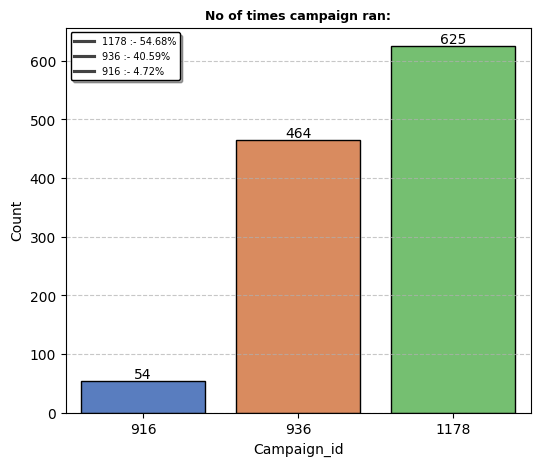

In [11]:
### NO OF TIMES A CAMPAIGN RAN

different_campaigns=sales["campaign_id"].value_counts()
total=different_campaigns.sum()

percentage=np.round((different_campaigns.values/total*100),2)
plt.figure(figsize=(6,5))
ax=sns.barplot(x=different_campaigns.index,y=different_campaigns.values,palette="muted",edgecolor="black")

legend_label=[f"{Campaign} :- {pct:.2f}%"
             for Campaign,pct in zip(different_campaigns.index,percentage)]
             
ax.legend(labels=legend_label,fontsize=7,edgecolor="black",shadow=True)
for bars in ax.containers:
    ax.bar_label(bars)

plt.xlabel("Campaign_id")
plt.ylabel("Count")
plt.title("No of times campaign ran:",fontsize=9,fontweight="bold")
ax.grid(axis='y', linestyle='--', alpha=0.7)

* **CTR is mostly low**- Most ads have CTR around **0.01 to 0.02** ,meaning clicks are rare.
* **CPC is stable**- Most ads cost around `$1.23` per click.

* **Cost of conversion varies a lot**- Some conveersions are cheap while othere cost over `$300`.
* **Many conversions are near zero**- Most ads have low conversion rates, but few perform exceptionally well, reaching **400 total conversions** and **200 approved conversions**. 

In [12]:
campaign_effectiveness=sales.groupby("campaign_id").agg(
    {
        "Impressions":"sum",
        "Clicks":"sum",
        "Spent":"sum",
        "Total_Conversion":"sum",
        "Approved_Conversion":"sum"
    }   
).reset_index()

campaign_effectiveness["CTR"]=(campaign_effectiveness["Clicks"]/campaign_effectiveness["Impressions"])*100
campaign_effectiveness["Total_Conversion(%)"]=campaign_effectiveness["Total_Conversion"]/campaign_effectiveness["Clicks"]*100
campaign_effectiveness["Approved_Conversion(%)"]=campaign_effectiveness["Approved_Conversion"]/campaign_effectiveness["Clicks"]*100
campaign_effectiveness["Cost_Per_Click"]=campaign_effectiveness["Spent"]/campaign_effectiveness["Clicks"]
campaign_effectiveness['Cost_Per_Conversion'] = campaign_effectiveness['Spent'] / campaign_effectiveness['Total_Conversion']
campaign_effectiveness

,campaign_id,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,Total_Conversion(%),Approved_Conversion(%),Cost_Per_Click,Cost_Per_Conversion
0,916,482925,113,149.710001,58,24,0.023399,51.327434,21.238938,1.324867,2.581207
1,936,8128187,1984,2893.369999,537,183,0.024409,27.066532,9.223790,1.458352,5.388026
2,1178,204823716,36068,55662.149959,2669,872,0.017609,7.399911,2.417656,1.543256,20.855058


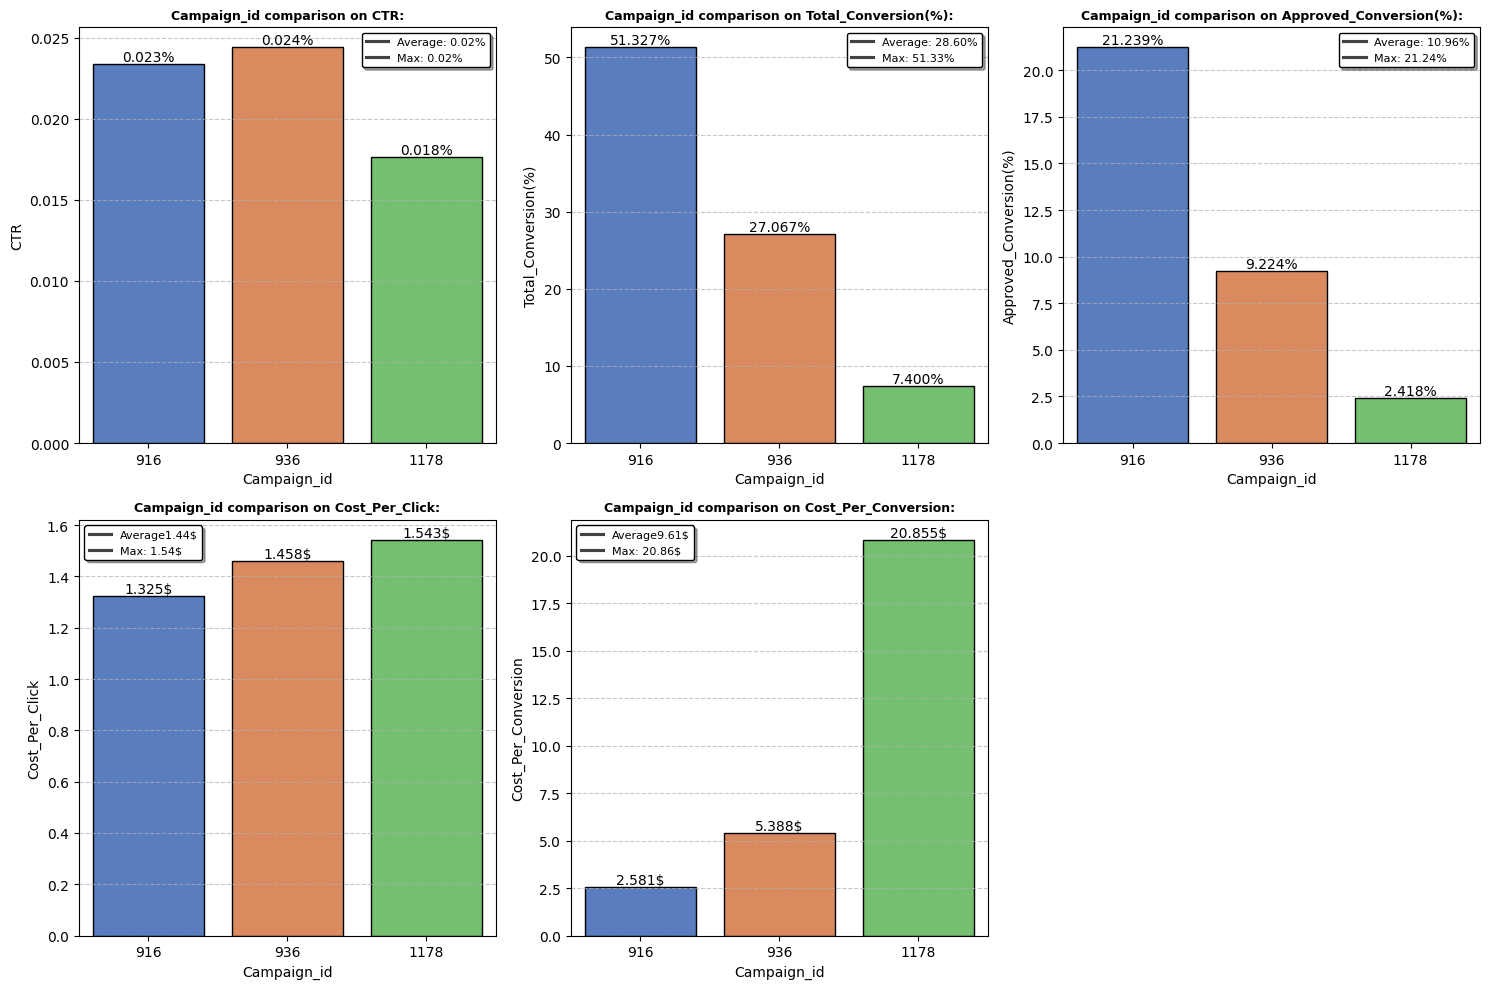

In [13]:
conversion_columns=["CTR", "Total_Conversion(%)", "Approved_Conversion(%)", "Cost_Per_Click", "Cost_Per_Conversion"]

metric_averages = campaign_effectiveness[conversion_columns].mean()
metric_max=campaign_effectiveness[conversion_columns].max()


n_rows=2
n_metrics=len(conversion_columns)
n_cols=(n_metrics+n_rows-1)//n_rows


fig,axes=plt.subplots(n_rows,n_cols,figsize=(5*n_cols,5*n_rows))
axes=axes.flatten()
for i,col in enumerate(conversion_columns):
    ax=axes[i]
    sns.barplot(data=campaign_effectiveness,x="campaign_id",y=campaign_effectiveness[col],hue=campaign_effectiveness["campaign_id"],legend=True,palette="muted",edgecolor="black",ax=ax)
    ax.set_title(f"Campaign_id comparison on {col}:",fontsize=9,fontweight="bold")
    ax.set_xlabel("Campaign_id")
    ax.set_ylabel(f"{col}")
    ax.grid(axis="y",linestyle="--",alpha=0.7)
    
    avg_value=metric_averages[col]
    max_value=metric_max[col]
    
    if col in ['CTR', 'Total_Conversion(%)', 'Approved_Conversion(%)']:
        label=[f"Average: {avg_value:.2f}%",
                   f"Max: {max_value:.2f}%"]
    else:
        label=[f"Average{avg_value:.2f}$",
                   f"Max: {max_value:.2f}$"]
        
    ax.legend(labels=label,loc="best",fontsize=8,edgecolor="black",shadow=True)   
    for bar in  ax.containers:
        if col in ['CTR', 'Total_Conversion(%)', 'Approved_Conversion(%)']:
            ax.bar_label(bar,fmt="%.3f%%")
        else:
            ax.bar_label(bar,fmt="%.3f$")
        

if n_metrics < n_rows * n_cols:
    fig.delaxes(axes[n_metrics])

plt.tight_layout()
plt.show()

#  **Key Findings**

#### **CTR is Similar Across Campaigns**  
- **Campaign 936** has the highest CTR (**0.024%**), followed by **916 (0.023%)** and **1178 (0.018%)**.  
- The difference is small, indicating **similar engagement levels across campaigns**.  

#### **Conversion Rates Vary Significantly**  
- **Campaign 916** has the **highest Total Conversion Rate (51.33%) and Approved Conversion Rate (21.24%)**.  
- **Campaign 936** performs moderately (**27.07% Total, 9.22% Approved**).  
- **Campaign 1178 is the least effective** (**7.40% Total, 2.42% Approved**), meaning **most impressions are not converting**.  

#### **Cost Per Click (CPC) is Similar**  
- **CPC is stable** across campaigns, ranging from (`$1.32`) to (`$1.54`), meaning ad cost per engagement is similar.  

#### **Cost Per Conversion is a Major Concern for Campaign 1178**  
- **Campaign 916 is the most cost-efficient** at (`$2.58`) per conversion**.  
- **Campaign 936 is slightly higher at (`$5.39`) per conversion**.  
- **Campaign 1178 is highly inefficient, costing (`$20.85`) per conversion**, suggesting poor audience targeting.  

# **Audience Segmentation Analysis**

### **Gender-Wise Performance Analysis**

C:\Users\kalra\AppData\Local\Temp\ipykernel_3784\2849695137.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=sales,x="gender",palette="deep",order=Gender_count.index)


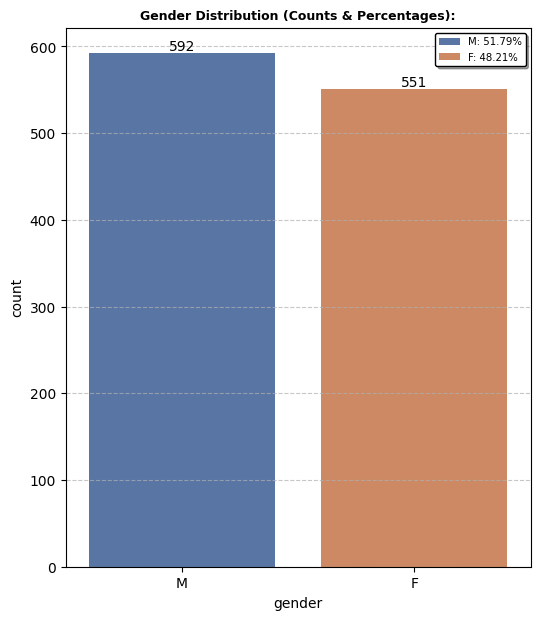

In [14]:
Gender_count=sales["gender"].value_counts().sort_values(ascending=False)
total=Gender_count.sum()

percentage = np.round((Gender_count.values / total * 100), 2)
plt.figure(figsize=(6,7))
plt.title("Gender Distribution (Counts & Percentages):",fontsize=9,fontweight="bold")

ax=sns.countplot(data=sales,x="gender",palette="deep",order=Gender_count.index)
ax.grid(axis="y",linestyle="--",alpha=0.7)

total=Gender_count.sum()

for bar in ax.containers:
    ax.bar_label(bar)


legend_labels=[f"{gender}: {pct:.2f}%"
              for gender,pct in zip(Gender_count.index,percentage)]

ax.legend(labels=legend_labels,edgecolor="black",loc="best",fontsize=7.3,shadow=True)

In [15]:
Gender_count=sales["gender"].value_counts().sort_values()
Gender_count

gender
F    551
M    592
Name: count, dtype: int64

In [16]:
gender_metrics = sales.groupby("gender").agg({
    "Impressions": "sum",
    "Clicks": "sum",
    "Spent": "sum",
    "Total_Conversion": "sum",
    "Approved_Conversion": "sum"
}).reset_index()

gender_metrics["CTR"] = (gender_metrics["Clicks"] / gender_metrics["Impressions"]) * 100
gender_metrics["Total_Conversion_Rate(%)"] = (gender_metrics["Total_Conversion"] / gender_metrics["Clicks"]) * 100
gender_metrics["Approved_Conversion_Rate(%)"] = (gender_metrics["Approved_Conversion"] / gender_metrics["Clicks"]) * 100
gender_metrics["Cost_Per_Click"] = gender_metrics["Spent"] / gender_metrics["Clicks"]
gender_metrics["Cost_Per_Conversion"] = gender_metrics["Spent"] / gender_metrics["Total_Conversion"]



In [17]:
gender_metrics

,gender,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,Total_Conversion_Rate(%),Approved_Conversion_Rate(%),Cost_Per_Click,Cost_Per_Conversion
0,F,114862847,23878,34502.619963,1644,495,0.020788,6.884999,2.073038,1.444954,20.986995
1,M,98571981,14287,24202.609995,1620,584,0.014494,11.338979,4.087632,1.694030,14.939883


C:\Users\kalra\AppData\Local\Temp\ipykernel_3784\2642304478.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_metrics,x="gender",y=col,palette="muted",edgecolor="black",ax=ax)
C:\Users\kalra\AppData\Local\Temp\ipykernel_3784\2642304478.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_metrics,x="gender",y=col,palette="muted",edgecolor="black",ax=ax)
C:\Users\kalra\AppData\Local\Temp\ipykernel_3784\2642304478.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_metrics,x="gender",y=col,palette="muted"

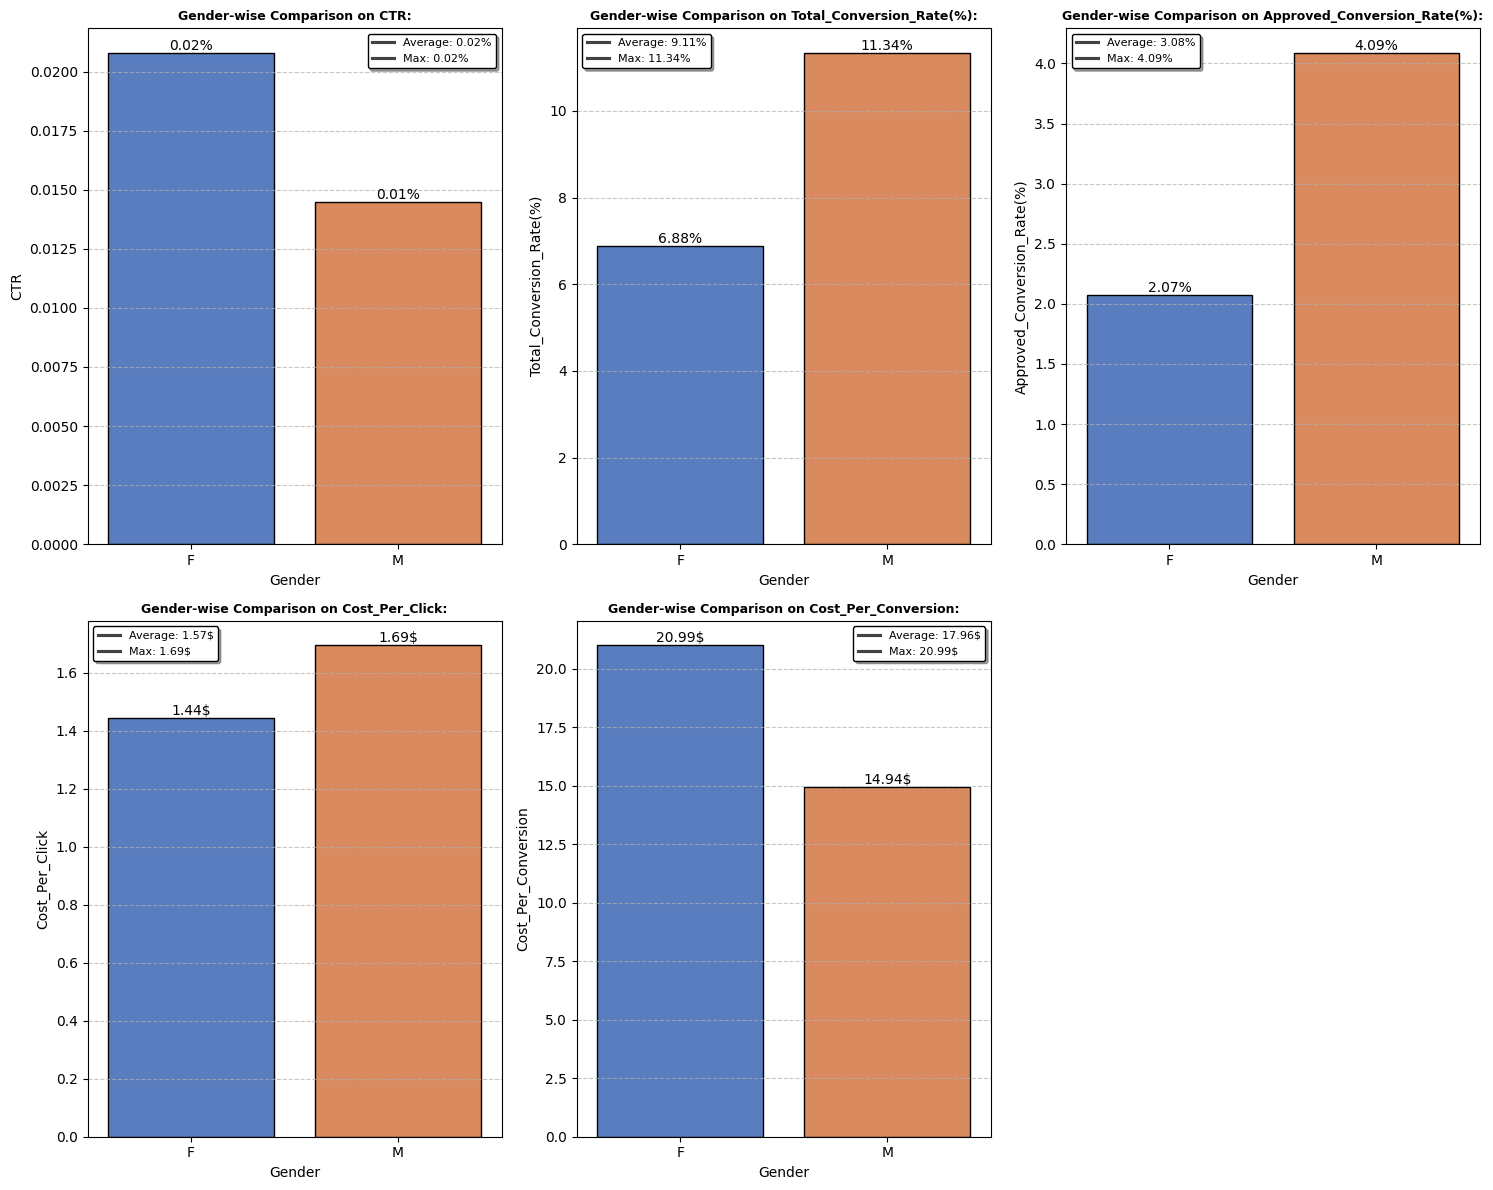

In [18]:
conversion_columns = ["CTR", "Total_Conversion_Rate(%)", "Approved_Conversion_Rate(%)", "Cost_Per_Click", "Cost_Per_Conversion"]

# Calculate averages & max values for annotations
metric_averages = gender_metrics[conversion_columns].mean()
metric_max = gender_metrics[conversion_columns].max()

# Set up subplots
n_rows = 2
n_metrics = len(conversion_columns)
n_cols = (n_metrics + n_rows - 1) // n_rows  # Ensure balanced grid

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 6 * n_rows))
axes = axes.flatten()

for i, col in enumerate(conversion_columns):
    ax=axes[i]
    sns.barplot(data=gender_metrics,x="gender",y=col,palette="muted",edgecolor="black",ax=ax)
    ax.set_title(f"Gender-wise Comparison on {col}:", fontsize=9, fontweight="bold")
    ax.set_xlabel("Gender")
    ax.set_ylabel(f"{col}")
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    
    avg_value = metric_averages[col]
    max_value = metric_max[col]
    
    if col in ["CTR", "Total_Conversion_Rate(%)", "Approved_Conversion_Rate(%)"]:
        label = [f"Average: {avg_value:.2f}%", f"Max: {max_value:.2f}%"]
    else:
        label = [f"Average: {avg_value:.2f}$", f"Max: {max_value:.2f}$"]
    
    ax.legend(labels=label, loc="best", fontsize=8, edgecolor="black", shadow=True)
    

    ### ADDING BAR LABELS
    for bar in ax.containers:
        if col in ["CTR", "Total_Conversion_Rate(%)", "Approved_Conversion_Rate(%)"]:
            ax.bar_label(bar, fmt="%.2f%%")
        else:
            ax.bar_label(bar, fmt="%.2f$")

## REMOVING EMPTY SUBPLOTS
if n_metrics < n_rows * n_cols:
    fig.delaxes(axes[n_metrics])
plt.tight_layout()
plt.show()    



#### ***KEY FINDINGS**
* **Females have a higher CTR (0.02%) than Males (0.01%)**, indicating they are more likely to engage with ads.

* **Males have a better Total Conversion Rate (11.34%) compared to Females (6.88%)**, suggesting that although females click more, males are more likely to convert.  
* **Approved Conversion Rate is also higher for Males (4.09%) vs. Females (2.07%)**, meaning male conversions are more likely to be approved.  
* **Females have a significantly higher Cost Per Conversion (`$20.99`) compared to Males (`$14.94`)**, making male-targeted ads more cost-efficient.  
* **Cost Per Click (CPC) is slightly higher for Males (`$1.69`) than Females (`$1.44`)**, but the gap is minimal.


# **Age Group Performance Analysis**

C:\Users\kalra\AppData\Local\Temp\ipykernel_3784\2818991469.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=sales,x="age",edgecolor="black",palette="deep")


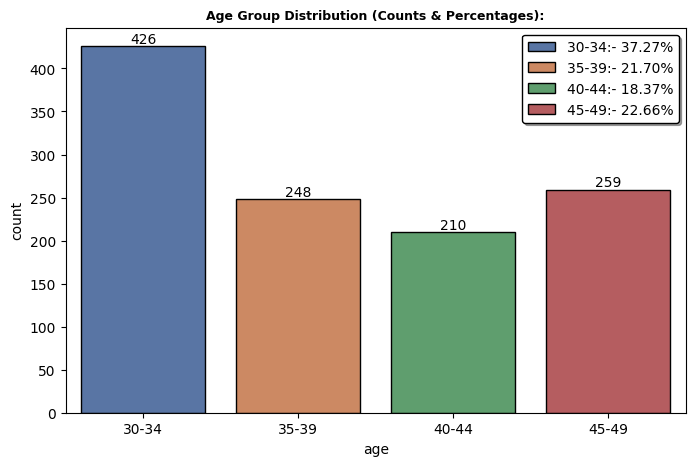

In [19]:
age_group_count=sales["age"].value_counts().sort_index()
total_age=age_group_count.sum()
percentage=np.round((age_group_count.values/total_age*100),2)

plt.figure(figsize=(8,5))
plt.title("Age Group Distribution (Counts & Percentages):",fontsize=9,fontweight="bold")

ax=sns.countplot(data=sales,x="age",edgecolor="black",palette="deep")

for bar in ax.containers:
    ax.bar_label(bar)

legend_label=[f"{age_group}:- {pct:.2f}%"
             for age_group,pct in zip(age_group_count.index,percentage)]

ax.legend(labels=legend_label,loc="best",shadow=True,edgecolor="black")

In [20]:
age_effectiveness = sales.groupby("age").agg({
    "Impressions": "sum",
    "Clicks": "sum",
    "Spent": "sum",
    "Total_Conversion": "sum",
    "Approved_Conversion": "sum"
}).reset_index()

# Calculate conversion-related metrics using correct formula
age_effectiveness["CTR"] = (age_effectiveness["Clicks"] / age_effectiveness["Impressions"]) * 100
age_effectiveness["Total_Conversion(%)"] = (age_effectiveness["Total_Conversion"] / age_effectiveness["Clicks"]) * 100
age_effectiveness["Approved_Conversion(%)"] = (age_effectiveness["Approved_Conversion"] / age_effectiveness["Clicks"]) * 100
age_effectiveness["Cost_Per_Click"] = age_effectiveness["Spent"] / age_effectiveness["Clicks"]
age_effectiveness["Cost_Per_Conversion"] = age_effectiveness["Spent"] / age_effectiveness["Total_Conversion"]

age_effectiveness.head()


,age,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,Total_Conversion(%),Approved_Conversion(%),Cost_Per_Click,Cost_Per_Conversion
0,30-34,67993019,9483,15252.399986,1431,494,0.013947,15.090161,5.209322,1.608394,10.658560
1,35-39,42104644,7094,11112.429994,626,207,0.016848,8.824359,2.917959,1.566455,17.751486
2,40-44,39604307,7736,11589.729981,523,170,0.019533,6.760600,2.197518,1.498155,22.160096
3,45-49,63732858,13852,20750.669997,684,208,0.021734,4.937915,1.501588,1.498027,30.337237


C:\Users\kalra\AppData\Local\Temp\ipykernel_3784\1299257307.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_effectiveness,x="age",y=age_effectiveness[col],palette="muted",edgecolor="black",ax=ax)
C:\Users\kalra\AppData\Local\Temp\ipykernel_3784\1299257307.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_effectiveness,x="age",y=age_effectiveness[col],palette="muted",edgecolor="black",ax=ax)
C:\Users\kalra\AppData\Local\Temp\ipykernel_3784\1299257307.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_effec

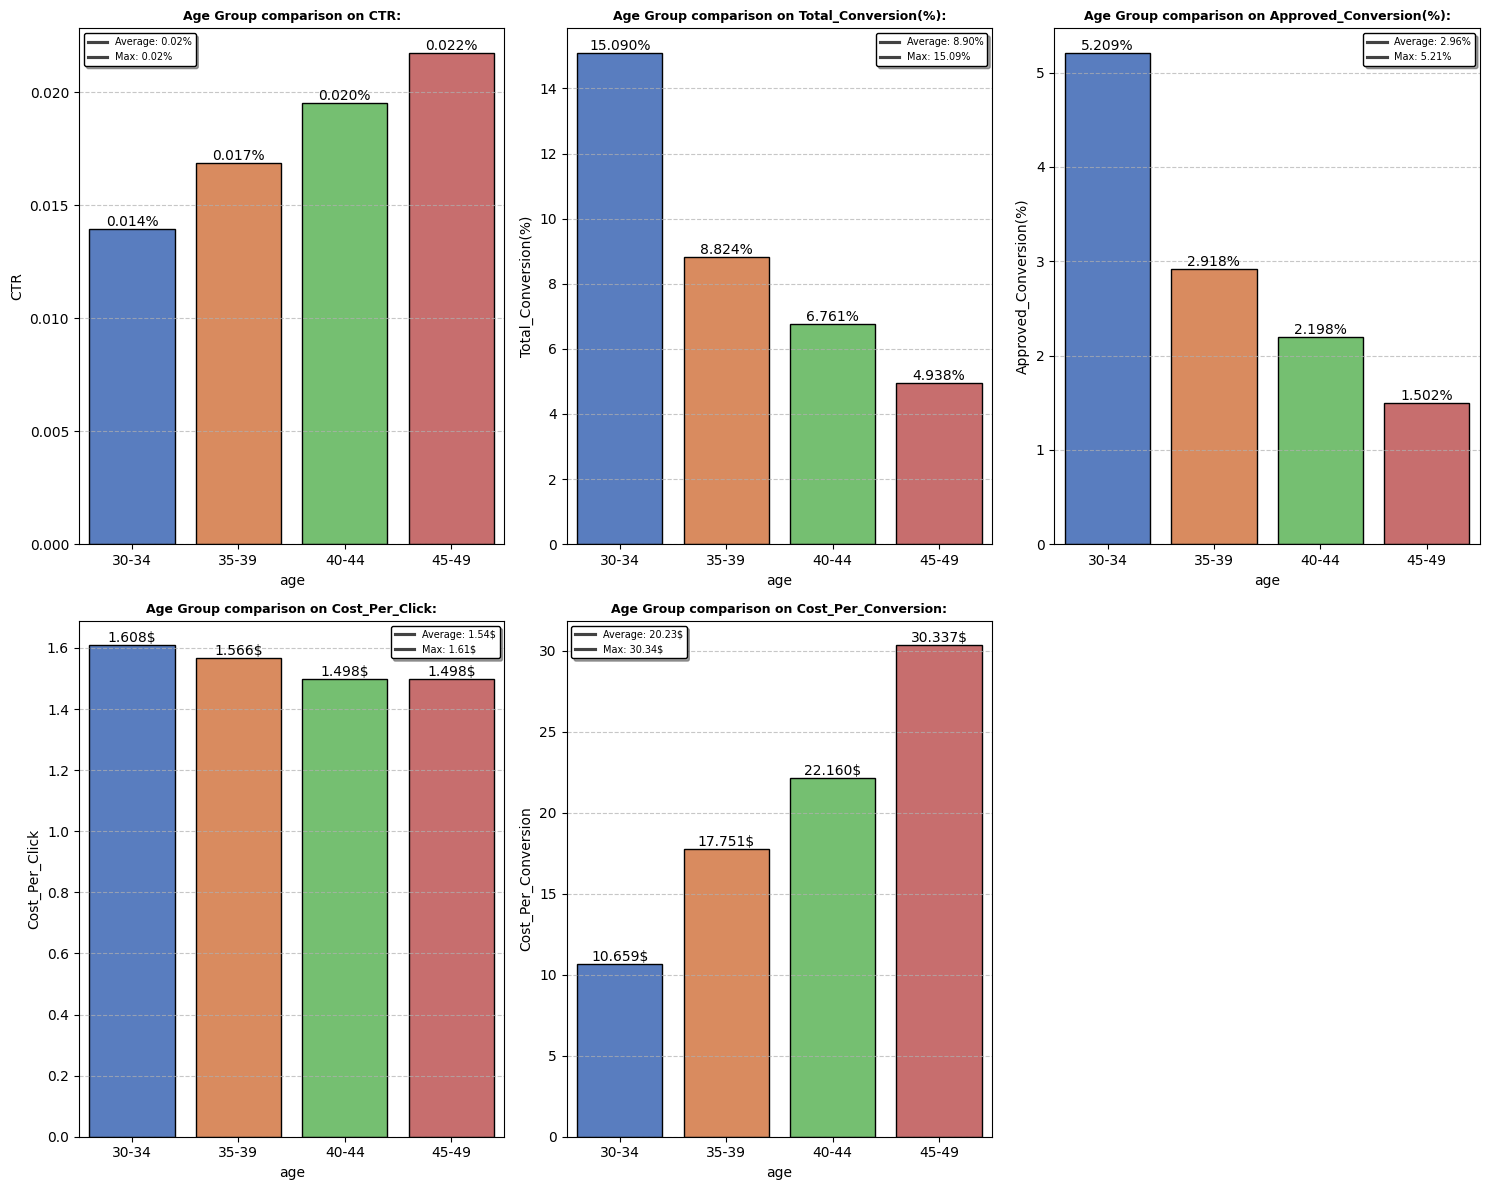

In [21]:
conversion_columns = ["CTR", "Total_Conversion(%)", "Approved_Conversion(%)", "Cost_Per_Click", "Cost_Per_Conversion"]

metric_averages = age_effectiveness[conversion_columns].mean()
metric_max= age_effectiveness[conversion_columns].max()


n_rows=2
n_metrics=len(conversion_columns)
n_cols=(n_metrics+n_rows-1)//n_rows


fig,axes=plt.subplots(n_rows,n_cols,figsize=(5*n_cols,6*n_rows))
axes=axes.flatten()
for i,col in enumerate(conversion_columns):
    ax=axes[i]
    sns.barplot(data=age_effectiveness,x="age",y=age_effectiveness[col],palette="muted",edgecolor="black",ax=ax)
    ax.set_title(f"Age Group comparison on {col}:",fontsize=9,fontweight="bold")
    ax.set_xlabel("age")
    ax.set_ylabel(f"{col}")
    ax.grid(axis="y",linestyle="--",alpha=0.7)
    
    avg_value=metric_averages[col]
    max_value=metric_max[col]
    
    if col in ['CTR', 'Total_Conversion(%)', 'Approved_Conversion(%)']:
        avg_label=[f"Average: {avg_value:.2f}%",
                  f"Max: {max_value:.2f}%"]
    else:
        avg_label=[f"Average: {avg_value:.2f}$",
                  f"Max: {max_value:.2f}$"]
        
    ax.legend(avg_label,loc="best",fontsize=7,edgecolor="black",shadow=True)   
    for bar in  ax.containers:
        if col in ['CTR', 'Total_Conversion(%)', 'Approved_Conversion(%)']:
            ax.bar_label(bar,fmt="%.3f%%")
        else:
            ax.bar_label(bar,fmt="%.3f$")
        

if n_metrics < n_rows * n_cols:
    fig.delaxes(axes[n_metrics])

plt.tight_layout()
plt.show()

### ***KEY FINDINGS**
#### **CTR (Click-Through Rate)**
- The **45-49 age group** has the **highest CTR (0.022%)**, followed by **40-44 (0.020%)**.
- The **30-34 age group** has the **lowest CTR (0.014%)**, indicating **lower engagement**.

#### **Total Conversion Rate (%)**
- The **30-34 age group** has the **highest conversion rate (15.09%)**, showing strong engagement and follow-through.
- Conversion rates **decline with age**, with the **45-49 group converting the least (4.93%)**.

#### **Approved Conversion Rate (%)**
- The **30-34 age group** has the **highest Approved Conversion Rate (5.21%)**, suggesting **better-quality conversions**.
- The **45-49 age group** has the **lowest Approved Conversion Rate (1.50%)**, indicating **weaker lead quality**.

#### **Cost Per Click (CPC)**
- CPC remains **relatively stable** across age groups (**$1.49 - $1.60**).
- The **30-34 age group has the highest CPC ($1.56)**, making clicks costlier.

#### **Cost Per Conversion**
- The **30-34 age group** is the **most cost-efficient (`$10.65` per conversion)**.
- The **45-49 age group** is the **least cost-efficient (`$30.33` per conversion)**, meaning **higher ad spend with lower returns**.
  


# **Interests Analysis**

In [23]:
interest_effectiveness = sales.groupby("interest").agg({
    "Impressions": "sum",
    "Clicks": "sum",
    "Spent": "sum",
    "Total_Conversion": "sum",
    "Approved_Conversion": "sum"
}).reset_index()

# Correcting Cost_Per_Click calculation
interest_effectiveness["CTR"] = (interest_effectiveness["Clicks"] / interest_effectiveness["Impressions"]) * 100

interest_effectiveness["Cost_Per_Click"] = interest_effectiveness["Spent"] / interest_effectiveness["Clicks"]

# Compute Conversion Rates
interest_effectiveness["Total_Conversion_Rate(%)"] = (interest_effectiveness["Total_Conversion"] / interest_effectiveness["Clicks"]) * 100
interest_effectiveness["Approved_Conversion_Rate(%)"] = (interest_effectiveness["Approved_Conversion"] / interest_effectiveness["Clicks"]) * 100

# Cost Per Conversion
interest_effectiveness["Cost_Per_Conversion"] = interest_effectiveness["Spent"] / interest_effectiveness["Total_Conversion"]

# Get Top 5 Interests
top5_interests = interest_effectiveness.sort_values(by="Total_Conversion_Rate(%)", ascending=False).head(5).reset_index(drop=True)

top5_interests


,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,Cost_Per_Click,Total_Conversion_Rate(%),Approved_Conversion_Rate(%),Cost_Per_Conversion
0,36,922928,128,205.740000,28,10,0.013869,1.607344,21.875000,7.812500,7.347857
1,31,1075312,195,299.099999,33,16,0.018134,1.533846,16.923077,8.205128,9.063636
2,104,1412110,265,387.919999,43,8,0.018766,1.463849,16.226415,3.018868,9.021395
3,112,2324572,339,483.799999,53,15,0.014583,1.427139,15.634218,4.424779,9.128302
4,7,2612839,410,648.929999,59,19,0.015692,1.582756,14.390244,4.634146,10.998814


C:\Users\kalra\AppData\Local\Temp\ipykernel_3784\4068260013.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_interests, x="interest", y=col, palette="muted", edgecolor="black", ax=ax)
C:\Users\kalra\AppData\Local\Temp\ipykernel_3784\4068260013.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_interests, x="interest", y=col, palette="muted", edgecolor="black", ax=ax)
C:\Users\kalra\AppData\Local\Temp\ipykernel_3784\4068260013.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_interests, x="interest", y=c

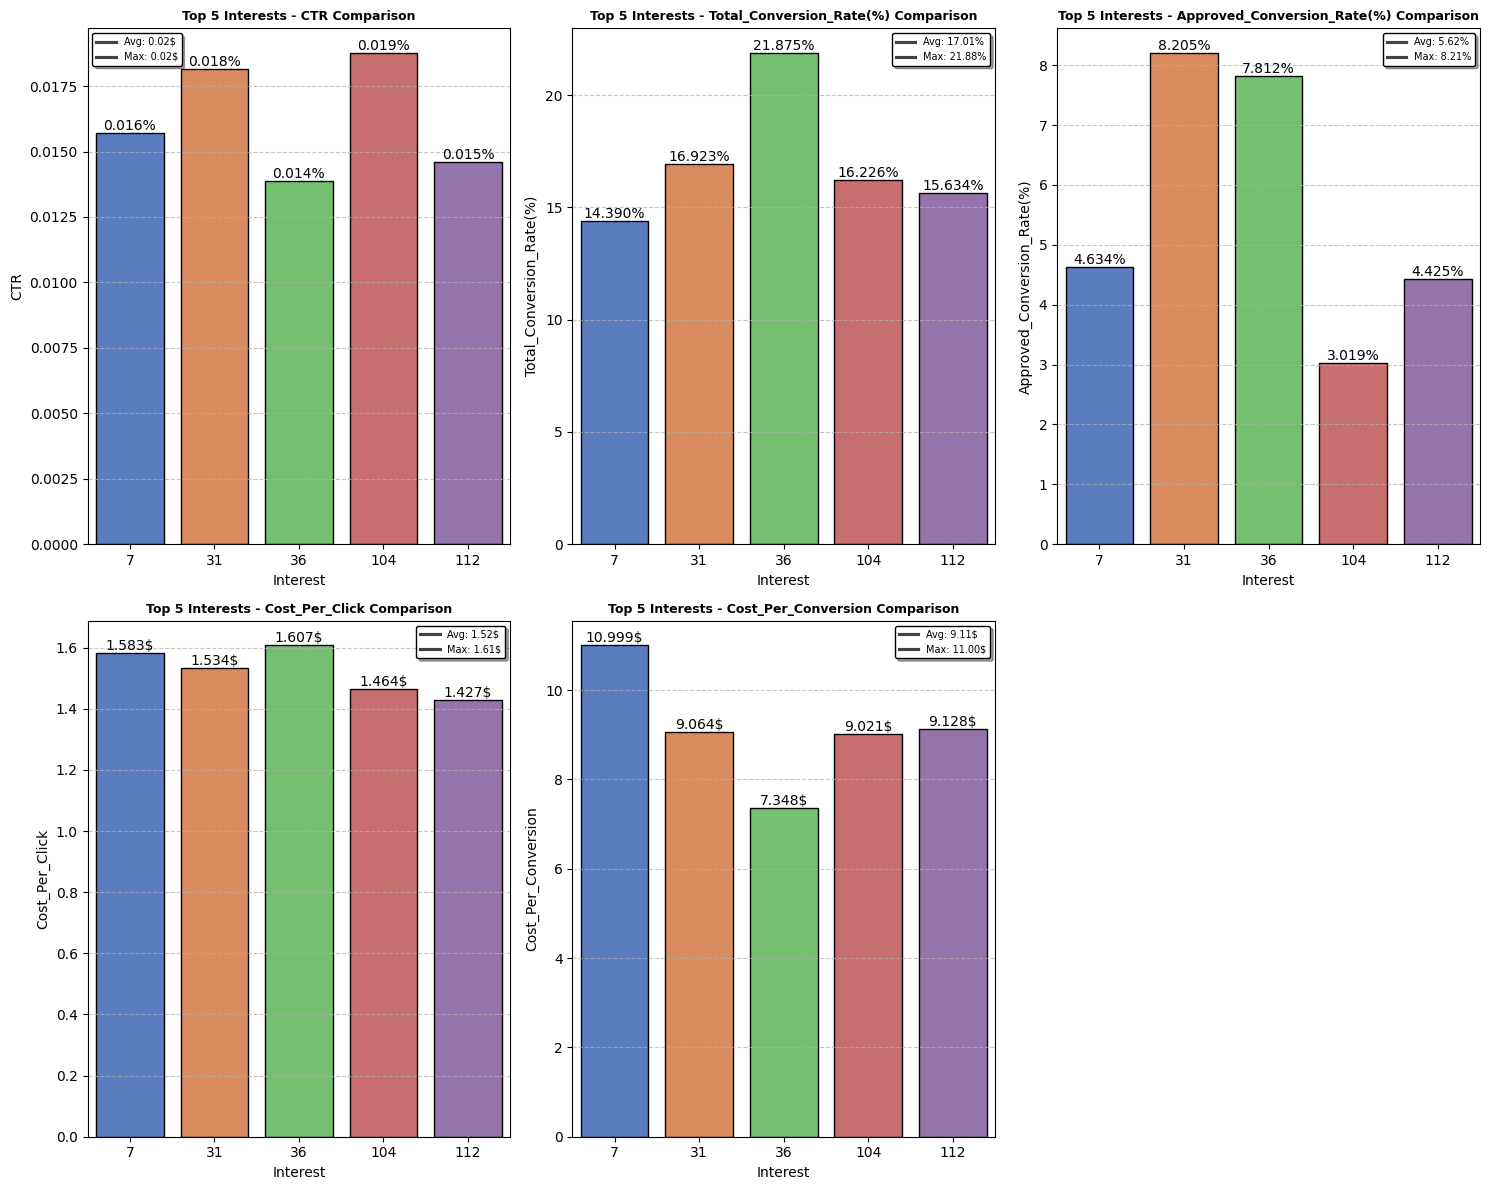

In [24]:
conversion_columns = ["CTR", "Total_Conversion_Rate(%)", "Approved_Conversion_Rate(%)","Cost_Per_Click", "Cost_Per_Conversion"]

metric_averages = top5_interests[conversion_columns].mean()
metric_max = top5_interests[conversion_columns].max()
n_rows = 2
n_metrics = len(conversion_columns)
n_cols = (n_metrics + n_rows - 1) // n_rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 6 * n_rows))
axes = axes.flatten()

for i, col in enumerate(conversion_columns):
    ax = axes[i]
    sns.barplot(data=top5_interests, x="interest", y=col, palette="muted", edgecolor="black", ax=ax)
    ax.set_title(f"Top 5 Interests - {col} Comparison", fontsize=9, fontweight="bold")
    ax.set_xlabel("Interest")
    ax.set_ylabel(f"{col}")
    ax.grid(axis="y", linestyle="--", alpha=0.7)
    avg_value = metric_averages.loc[col]
    max_value = metric_max.loc[col]

    if col in ['Total_Conversion_Rate(%)', 'Approved_Conversion_Rate(%)']:
        avg_label = [f"Avg: {avg_value:.2f}%", f"Max: {max_value:.2f}%"]
    else:
        avg_label = [f"Avg: {avg_value:.2f}$", f"Max: {max_value:.2f}$"]
    ax.legend(avg_label, loc="best", fontsize=7, edgecolor="black", shadow=True)
    
    for bar in ax.containers:
        if col in ['CTR', 'Total_Conversion_Rate(%)', 'Approved_Conversion_Rate(%)']:
            ax.bar_label(bar,fmt="%.3f%%")
        else:
            ax.bar_label(bar,fmt="%.3f$")
            
if n_metrics < n_rows * n_cols:
    fig.delaxes(axes[n_metrics])

plt.tight_layout()
plt.show()


### ***Key Findings**

#### **Click-Through Rate (CTR)**
- **Interest 104** has the highest CTR (**0.02%**), closely followed by **31** and **7**.
- **Interest 36** has a lower CTR (**0.01%**), indicating relatively lower engagement.

#### **Total Conversion Rate**
- **Interest 36** leads with the highest **Total Conversion Rate** (**21.88%**), significantly outperforming others.
- **Interests 31 (16.92%)** and **104 (16.23%)** also perform well.
- **Interest 7** has the lowest **Total Conversion Rate (14.39%)**.

#### **Approved Conversion Rate**
- **Interest 31** has the highest **Approved Conversion Rate** (**8.21%**), followed by **36 (7.81%)**.
- **Interest 104** has the lowest **Approved Conversion Rate (3.02%)**, indicating inefficiency in final conversions.

#### **Cost Per Click (CPC)**
- **Interest 36** has the highest **CPC (`$1.61`)**, making it more expensive to acquire clicks.
- **Interest 112** has the lowest **CPC (`$1.43`)**, meaning it is more cost-effective in driving traffic.

#### **Cost Per Conversion**
- **Interest 7** has the highest **Cost Per Conversion (`$11.00`)**, meaning conversions are expensive.
- **Interest 36** has the lowest **Cost Per Conversion (`$7.35`)**, making it the most cost-efficient.

In [25]:
campaign_effectiveness

,campaign_id,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,Total_Conversion(%),Approved_Conversion(%),Cost_Per_Click,Cost_Per_Conversion
0,916,482925,113,149.710001,58,24,0.023399,51.327434,21.238938,1.324867,2.581207
1,936,8128187,1984,2893.369999,537,183,0.024409,27.066532,9.223790,1.458352,5.388026
2,1178,204823716,36068,55662.149959,2669,872,0.017609,7.399911,2.417656,1.543256,20.855058


#### How many ads have zero conversion

In [26]:
sales[sales["Total_Conversion"]==0].shape[0]

8

In [27]:
sales[sales["Clicks"]==0].shape[0]

207

## Hypothesis 1: Zero Clicks Should Mean Zero Conversions
**Objective**: Check if ads with no clicks (`Clicks = 0`) always have no conversions (`Total_Conversion = 0`), expecting equal counts.

#### Step 1: Count Zero Clicks and Zero Conversions

In [28]:
zero_clicks_counts=sales[sales["Clicks"]==0].shape[0]
print(f"Ads with 0 clicks: {zero_clicks_counts}")
zero_total_conversion_count=sales[sales["Total_Conversion"]==0].shape[0]
print(f"Ads with 0 total_conversion:{zero_total_conversion_count}")

Ads with 0 clicks: 207
Ads with 0 total_conversion:8


**In total, from our dataset, out of all the ads played across active campaigns, _8_ ads generated zero conversions.**


In [29]:
zero_clicks = sales[sales['Clicks'] == 0]
print("Total conversion breakdown for ads with zero clicks:")
zero_clicks['Total_Conversion'].value_counts()

Total conversion breakdown for ads with zero clicks:


Total_Conversion
1    196
2      8
0      3
Name: count, dtype: int64

#### Step 2: Investigate zero click ads

Since 207 not equal to 8 we will analyse total conversion for ads with zero clicks

#### FINDING

**Hypothesis Disproved:** Only 3 of zero click ads had 'Total_Conversion=0'; 204(196 with 1 and 8 with 2) had conversions despite no clicks.

**Prediction:**
No of clicks do not have effect on total conversion maybe an impression can also generate a conversion

#### FINDING FACEBOOK_CAMPAIGN_ID'S WHICH RESULTED IN ZERO CONVERSION

In [30]:
zero_conversion=sales[sales["Total_Conversion"]==0]
zero_conversion[["campaign_id","fb_campaign_id"]]

,campaign_id,fb_campaign_id
95,936,108792
184,936,110962
221,936,115510
510,936,123736
655,1178,144582
866,1178,144660
981,1178,144714
990,1178,144720


## BIVARIATE ANALYSIS: Exploring relationship between 2 variables

#### ANALYSIS
More spending does lead to more conversions as they are coorelated but it is not directly proportional

### *DOES HIGHER NO OF IMPRESSION RESULT IN MORE CONVERSIONS??

*Correlation between Impression and conversion*:0.813


<Axes: xlabel='log_impression', ylabel='log_total_conversion'>

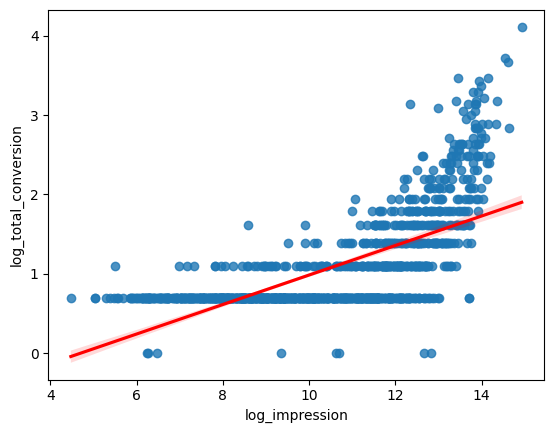

In [31]:
print(f"*Correlation between Impression and conversion*:{sales["Impressions"].corr(sales["Total_Conversion"]):.3f}")
sales["log_impression"]=np.log1p(sales["Impressions"])
sales["log_total_conversion"]=np.log1p(sales["Total_Conversion"])
sns.regplot(x="log_impression",y="log_total_conversion",data=sales,line_kws={"color":"red"})

In [32]:
sales.drop(columns=["log_impression","log_total_conversion"],inplace=True)

### *KEY FINDINGS

* The correlation coefficient between **Impressions** and **Total Conversions** is **0.813**.
* This indicates a **strong positive correlation**, meaning that as **Impressions increase, Total Conversions also tend to increase**.
* From scatter plot we can observe that a **positive trend** is visible, supporting the strong correlation.

#####  ***RECOMMENDATION**
* Since a high number of **Impressions** is associated with more **Conversions**, optimizing **ad visibility** could further improve conversions.
* While **Impressions** are directly proportional to **Conversions**, we should analyze **CTR & CPC** to ensure increase Impressions is **efficient**. If **Impressions increase significantly** but **CTR improves only slightly**, it indicates **low engagement**, making it **cost-ineffective** to keep increasing Impressions.

#### CTR VS IMPRESSION ANALYSIS

*CORRELATION BETWEEN MONEY SPENT AND CTR IS*: 0.07591385795747423


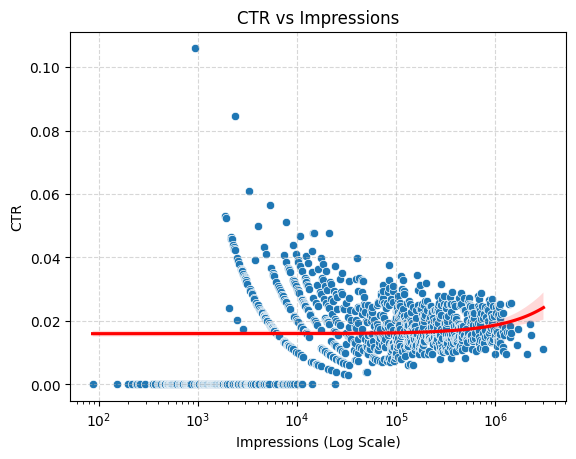

In [33]:
print(f"*CORRELATION BETWEEN MONEY SPENT AND CTR IS*: {sales["Impressions"].corr(sales["CTR"])}")
data_imp=sales.groupby("Impressions")["CTR"].mean().reset_index()
ax=sns.scatterplot(data=data_imp,x="Impressions",y="CTR")
ax.set_xscale("log") 
sns.regplot(data=data_imp, x="Impressions", y="CTR", scatter=False, ax=ax, line_kws={"color": "red"})
plt.title("CTR vs Impressions")
plt.xlabel("Impressions (Log Scale)")
plt.ylabel("CTR")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

### *KEY FINDINGS

*  **CTR decreases as impressions increase**, meaning **while more impressions lead to higher total clicks and conversions, engagement per impression (CTR) declines**

* **Reasons for it**
* *  If company were to increase impressions, ad is shown to less relevant users, so fewer people click, making CTR drop.
  *  But since company is showing the ad to way more people, the total number of clicks and conversions still increases.

##### CONCLUSION
 #### ***Increasing impressions alone is not the best strategy for improving CTR and should be paired with audience targeting optimization.**
  

In [34]:
sales.head(1)

,ad_id,campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,Cost_per_conversion,Conversion_per_spend,Total_conversion_rate,Approved_conversion_rate
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,1.43,0.715,1.398601,200.0,100.0


#### DOES MORE SPENDING LEAD TO MORE CLICKS??

In [35]:
# Correlation (raw and log)
print(f"Correlation (Spent vs Total_conversion):{sales["Spent"].corr(sales["Total_Conversion"]):.3f}")

# Summary stats
print(sales[['Spent', 'Total_Conversion']].describe())

Correlation (Spent vs Total_conversion):0.725
             Spent  Total_Conversion
count  1143.000000       1143.000000
mean     51.360656          2.855643
std      86.908418          4.483593
min       0.000000          0.000000
25%       1.480000          1.000000
50%      12.370000          1.000000
75%      60.025000          3.000000
max     639.949998         60.000000


*CORRELATION BETWEEN MONEY SPENT AND CONVERSIONS IS*: 0.7253794481828476


Text(0, 0.5, 'Total Conversions')

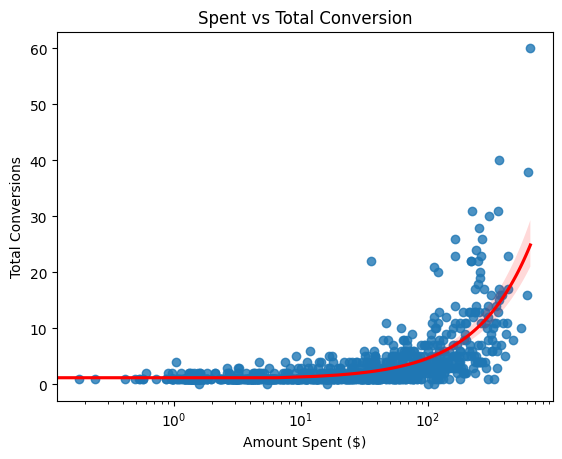

In [36]:
print(f"*CORRELATION BETWEEN MONEY SPENT AND CONVERSIONS IS*: {sales["Spent"].corr(sales["Total_Conversion"])}")
ax=sns.regplot(x='Spent', y='Total_Conversion', data=sales, line_kws={'color': 'red'})
ax.set_xscale("log")
plt.title('Spent vs Total Conversion')
plt.xlabel('Amount Spent ($)')
plt.ylabel('Total Conversions')

### *KEY FINDINGS
* The correlation coefficient between **Spent** and **Total Conversions** is **0.725**.
* This indicates a **strong positive correlation**, meaning that as **Spent increase, Total Conversions also tend to increase**.

#####  ***RECOMMENDATION**
* Since increasing**amount spent** is associated with more **Conversions**, Increasing **amount spent** could further improve conversions.
* While **spent** is directly proportional to **Conversions**, we should analyze **CTR & CPC** to ensure increased ad spend is **efficient**. If **Spent increase significantly** but **CTR improves only slightly**, it indicates **low engagement**, making it **cost-ineffective** to keep increasing money spent.

*CORRELATION BETWEEN MONEY SPENT AND CTR IS*: 0.1409519771712642


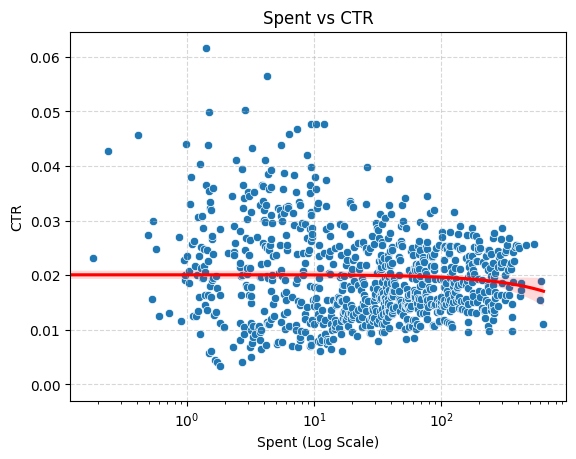

In [37]:
print(f"*CORRELATION BETWEEN MONEY SPENT AND CTR IS*: {sales["Spent"].corr(sales["CTR"])}")
data_spent=sales.groupby("Spent")["CTR"].mean().reset_index()
ax=sns.scatterplot(data=data_spent,x="Spent",y="CTR")
ax.set_xscale("log")
sns.regplot(data=data_spent, x="Spent", y="CTR", scatter=False,line_kws={"color": "red"})
plt.title("Spent vs CTR")
plt.xlabel("Spent (Log Scale)")
plt.ylabel("CTR")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

### *KEY FINDINGS

* **CTR slightly decreases** as **ad spend increases**, meaning **spending more money does not necessarily lead to higher engagement**.

* **Reasons for it**
* *  The curve shows that at **lower spending levels, CTR is more spread out**, meaning some ads perform well, while others don’t. 
  *  As spending increases, **CTR stabilizes but shows a slight decline**, suggesting **higher spending reaches broader, less engaged audiences**, reducing click rates.
  *  While **CTR drops slightly with more spending, total conversions may still increase** because higher spend leads to more **impressions and clicks**. 

#####   CONCLUSION
 #### ***Blindly increasing ad spend is not the best strategy for improving CTR and needs targeted optimization.**

In [38]:
sales.head(1)

,ad_id,campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,Cost_per_conversion,Conversion_per_spend,Total_conversion_rate,Approved_conversion_rate
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.013605,1.43,0.715,1.398601,200.0,100.0


In [41]:
conversion_columns_sales=["CTR","CPC","Cost_per_conversion","Conversion_per_spend","Total_conversion_rate","Approved_conversion_rate"]

## ***Best Demographics overall for running ads**

In [44]:
age_gender_interest_metrics = sales.groupby(["age", "gender"]).agg({
    "Impressions": "sum",
    "Clicks": "sum",
    "Spent": "sum",
    "Total_Conversion": "sum",
    "Approved_Conversion": "sum"
}).reset_index()

age_gender_interest_metrics["Total_Conversion_Rate(%)"] = np.where(
    age_gender_interest_metrics["Clicks"] > 0, 
    (age_gender_interest_metrics["Total_Conversion"] / age_gender_interest_metrics["Clicks"]) * 100, 
    np.nan
)

age_gender_interest_metrics["Approved_Conversion_Rate(%)"] = np.where(
    age_gender_interest_metrics["Clicks"] > 0, 
    (age_gender_interest_metrics["Approved_Conversion"] / age_gender_interest_metrics["Clicks"]) * 100, 
    np.nan
)

age_gender_interest_metrics["Cost_Per_Conversion"] = np.where(
    age_gender_interest_metrics["Total_Conversion"] > 0, 
    age_gender_interest_metrics["Spent"] / age_gender_interest_metrics["Total_Conversion"], 
    np.nan
)
age_gender_interest_metrics = age_gender_interest_metrics.sort_values(by="Total_Conversion_Rate(%)", ascending=False)

age_gender_interest_metrics


,age,gender,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Total_Conversion_Rate(%),Approved_Conversion_Rate(%),Cost_Per_Conversion
1,30-34,M,36421443,4384,7640.919991,812,299,18.521898,6.820255,9.410000
0,30-34,F,31571576,5099,7611.479995,619,195,12.139635,3.824279,12.296414
3,35-39,M,20665139,2933,5051.080003,322,112,10.978520,3.818616,15.686584
5,40-44,M,16208132,2559,4193.149997,201,77,7.854631,3.008988,20.861443
2,35-39,F,21439505,4161,6061.349992,304,95,7.305936,2.283105,19.938651
7,45-49,M,25277267,4411,7317.460004,285,96,6.461120,2.176377,25.675298
4,40-44,F,23396175,5177,7396.579984,322,93,6.219818,1.796407,22.970745
6,45-49,F,38455591,9441,13433.209993,399,112,4.226247,1.186315,33.667193


## **Key Findings**

1. **Highest Conversion Rate:**  
   - **Males aged 30-34** have the **highest Total Conversion Rate (18.52%)**, making them the most responsive audience.  
   - **Females aged 30-34** follow with **12.14%**, indicating that this age range is a strong target overall.  

2. **Cost Efficiency:**  
   - **Males aged 30-34** have the **lowest Cost Per Conve`rsion`($9.41$)**, meaning they generate conversions at the best value.  
   - **Females aged 30-34** have a slightly higher **Cost Per Conv`ersion`($12.30$)**.  
   - **Males aged 45-49 have the highest Cost Per Con`versio` ($25.68$)**, making them a less cost-effective group.  

3. **Click-to-Conversion Effectiveness:**  
   - **Males in the 30-34 age group** show the best click-to-conversion ratio, indicating strong engagement and purchase intent.  
   - **Older age groups (45-49, especially females) have lower conversion rates (~4.2%)**, suggesting possible ad fatigue or lower interest.  

4. **Ad Spend vs. Performance:**  
   - The highest spending was on **Fema`les aged 4`-49 ($13,433.21$)**, but their conversion rate was the lowest (**4.22%**), suggesting inefficient budget allocation.  
   - **Optimizing budget allocation** could improve overall campaign performance.  


#  **Final Summary: Facebook Ad Campaign Analysis**

##  **Key Findings**

* **Males aged 30-34** had the **highest Total Conversion Rate (18.52%)**, making them the most responsive audience.  
* **Females aged 30-34** followed with **12.14%**, showing strong engagement but slightly higher Cost Per Conversion.  
* **Males aged 45-49 had the highest Cost Per Conversion (`$25.68`)**, making them less cost-effective.  
* **The highest ad spend was on Females aged 45-49 (`$13,433.21`)**, but their **conversion rate was the lowest (4.22%)**, indicating inefficient budget allocation.  
* **CTR decreases as impressions increase**, suggesting that while higher impressions bring more clicks and conversions, they also reduce engagement per impression.  

---

##  **Recommendations to Optimize Campaign Performance**

###  **1. Increase Budget for Campaign 916**
- **Highest conversion efficiency** and **lowest cost per conversion** make it the **best-performing campaign**.
###  **2. Optimize or Reduce Budget for Campaign 1178**
- **Poor conversion rates** and **high cost per conversion (`$20.85`)** indicate inefficiency.
- **Improvement** in **ad targeting** is needed.
###  **3. Refine Targeting for Campaign 936**
- **Lower conversion rates** compared to Campaign 916.
- **Optimize ad creatives & audience selection** to improve performance.

###  **4. Prioritize Budget Allocation for High-Converting Groups**
- **Increase ad spend on Males aged 30-34** since they have the **best ROI**.  
- **Reduce budget for Females aged 45-49**, as their **Cost Per Conversion is too high** and conversions are low.  

###  **5. Improve Targeting for Moderate-Performing Age Groups**
- **Refine targeting for 35-39 and 40-44 age groups**, as they have **moderate CTR but lower conversions**.  
- **Test new ad creatives, landing pages, and personalized offers** to improve conversion rates.  

###  **6. Optimize Ad Creatives and Messaging**
- **Interest 104 has high CTR but low conversions**, suggesting **ad messaging or landing page issues**.  

###  **7. Reallocate Budget Towards Cost-Efficient Interests**
- **Increase spending on Interests 36 & 31**, as they have **strong conversion rates and low Cost Per Conversion**.  
- **Reduce ad spend on Interest 7**, which has **high Cost Per Conversion (`$11.00`)** and is inefficient.  

###  **8. Improve Cost Efficiency & Bidding Strategies**
- **Adjust bids for high CPC groups (35-39) to lower costs**.  
- **Use retargeting campaigns** to improve CTR and conversions without increasing CPC.  

##  **Final Strategy for Campaign Optimization**

- **Focus on high-converting demographics** (**Males 30-34**) while **reducing spend on low-performing groups** (*Females 45-49*).  
- **Improve ad creatives & CTAs** to boost engagement for underperforming segments.  
- **Test & iterate ad strategies** based on data-driven insights rather than just CTR.  
- **Refine audience segmentation & personalize targeting** for better conversions.  
- **Monitor Cost Per Conversion & ROI regularly** to optimize future campaign performance. 

### ***Final Takeaway:** 
- Simply **increasing impressions is not enough** :- successful campaigns require **strategic audience targeting, budget allocation, and    continuous optimization** for **maximum conversions and ROI.**  
